In [1]:
!pip install -q tensorflow==2.0.0b1

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print("GPU Available: ", tf.test.is_gpu_available())

     |████████████████████████████████| 87.9MB 51kB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 501kB 49.8MB/s 
     |████████████████████████████████| 3.1MB 47.9MB/s 


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

2.0.0-beta1
GPU Available:  False


/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [2]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

num_classes = 10

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(16, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, validation_split=0.2)
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

11493376/11490434 [==============================] - 0s 0us/step
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 63us/sample - loss: 0.3949 - accuracy: 0.8860 - val_loss: 0.2124 - val_accuracy: 0.9377
Epoch 2/10
48000/48000 [==============================] - 3s 57us/sample - loss: 0.1892 - accuracy: 0.9442 - val_loss: 0.1634 - val_accuracy: 0.9524
Epoch 3/10
48000/48000 [==============================] - 3s 58us/sample - loss: 0.1502 - accuracy: 0.9552 - val_loss: 0.1549 - val_accuracy: 0.9533
Epoch 4/10
48000/48000 [==============================] - 3s 58us/sample - loss: 0.1283 - accuracy: 0.9615 - val_loss: 0.1325 - val_accuracy: 0.9604
Epoch 5/10
48000/48000 [==============================] - 3s 59us/sample - loss: 0.1115 - accuracy: 0.9664 - val_loss: 0.1265 - val_accuracy: 0.9622
Epoch 6/10
48000/48000 [======================

In [3]:
random_index = np.random.randint(test_images.shape[0])

original_image = train_images[random_index]
original_image = tf.convert_to_tensor(original_image.reshape((1,28,28))) #The .reshape just gives it the proper form to input into the model, a batch of 1 a.k.a a tensor

original_label = tf.one_hot(train_labels[random_index], num_classes)

We can then look at the image and at it's label.

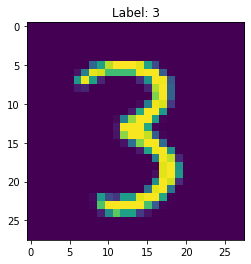

In [4]:
plt.figure()
plt.grid(False)

plt.imshow(np.reshape(original_image, (28,28)))
plt.title("Label: {}".format(np.argmax(original_label)))

plt.show()

In [5]:
def create_perturbation(modelfn, input_image, original_label):
  loss_object = tf.keras.losses.CategoricalCrossentropy()
  
  # Reference the docs for GradientTape in tf2.0 for more info
  with tf.GradientTape() as gt:
    # Define the calculation that needs to be derived
    gt.watch(input_image)
    prediction = modelfn(input_image)
    loss = loss_object(original_label, prediction)
  
  # Get the gradients for the loss w.r.t image
  grads = gt.gradient(loss, input_image)
  perturbation = tf.sign(grads)

  return perturbation

We can now create the respective perturbation for the image we chose earlier and see what it looks like and what the model classifies it as.


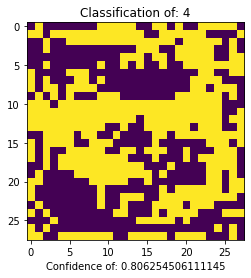

In [6]:
perturbation = create_perturbation(model, original_image, original_label)
perturbation_pred = model.predict(perturbation)

plt.figure()
plt.grid(False)
plt.imshow(np.reshape(perturbation,(28,28)))
plt.title("Classification of: {}".format(np.argmax(perturbation_pred)))
plt.xlabel("Confidence of: {}".format(np.max(perturbation_pred)))

plt.show()

In [7]:
def fgsm(modelfn, input_image, original_label, epsilon):
  perturbation = create_perturbation(modelfn, input_image, original_label)

  adv_example = input_image + (perturbation * epsilon)

  return adv_example

In [8]:
epsilon = 0.1

adv_image = fgsm(model, original_image, original_label, epsilon)
adv_image_pred = model.predict(adv_image)

Let's se what this looks like:

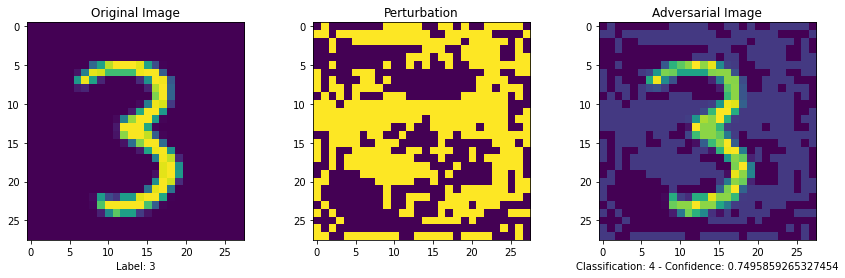

In [9]:
plt.figure()
plt.grid(False)

plt.subplot(1,3,1)
plt.subplots_adjust(right = 2)
plt.title("Original Image")
plt.imshow(np.reshape(original_image,(28,28)))
plt.xlabel("Label: {}".format(np.argmax(original_label)))

plt.subplot(1,3,2)
plt.subplots_adjust(right = 2)
plt.title("Perturbation")
plt.imshow(np.reshape(perturbation,(28,28)))


plt.subplot(1,3,3)
plt.subplots_adjust(right = 2)
plt.title("Adversarial Image")
plt.imshow(np.reshape(adv_image,(28,28)))
plt.xlabel("Classification: {} - Confidence: {}".format(np.argmax(adv_image_pred),np.max(adv_image_pred)))

plt.show()

In [ ]:
epsilon = 0.01
adv_image = fgsm(model, original_image, original_label, epsilon)
adv_image_pred = model.predict(adv_image)
print("Classification: {} - Confidence: {}".format(np.argmax(adv_image_pred),np.max(adv_image_pred)))

Classification: 4 - Confidence: 0.9853760600090027


In [ ]:
for n in range (1,100):

  epsilon = 0.001*n
  adv_image = fgsm(model, original_image, original_label, epsilon)
  adv_image_pred = model.predict(adv_image)
  print ('epsilon value=',epsilon)
  print("Classification: {} - Confidence: {}".format(np.argmax(adv_image_pred),np.max(adv_image_pred)))

epsilon value= 0.001
Classification: 4 - Confidence: 0.9996482133865356
epsilon value= 0.002
Classification: 4 - Confidence: 0.9994961023330688
epsilon value= 0.003
Classification: 4 - Confidence: 0.9992594122886658
epsilon value= 0.004
Classification: 4 - Confidence: 0.9988881945610046
epsilon value= 0.005
Classification: 4 - Confidence: 0.9983028173446655
epsilon value= 0.006
Classification: 4 - Confidence: 0.9973772764205933
epsilon value= 0.007
Classification: 4 - Confidence: 0.9959105253219604
epsilon value= 0.008
Classification: 4 - Confidence: 0.99366694688797
epsilon value= 0.009000000000000001
Classification: 4 - Confidence: 0.9903851747512817
epsilon value= 0.01
Classification: 4 - Confidence: 0.9853760600090027
epsilon value= 0.011
Classification: 4 - Confidence: 0.9777602553367615
epsilon value= 0.012
Classification: 4 - Confidence: 0.9662553071975708
epsilon value= 0.013000000000000001
Classification: 4 - Confidence: 0.9490466117858887
epsilon value= 0.014
Classification: 

### Targeted FGSM: A version of fgsm that can missclassify to a chosen desired label

In [ ]:
def targeted_fgsm(modelfn, input_image, target_label, epsilon):
  perturbation = create_perturbation(modelfn, input_image, target_label)

  adv_example = input_image - (perturbation * epsilon)

  return adv_example

Great! Now we'll choose a random image to then craft into an adversarial example that will be classified as whatever we want.

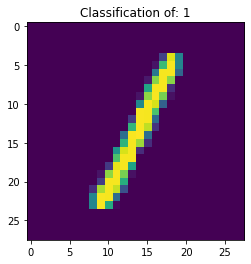

In [ ]:
random_index = np.random.randint(train_images.shape[0]) 

untargeted_image = tf.convert_to_tensor(train_images[random_index].reshape((1,28,28)))
untargeted_image_label = train_labels[random_index]

plt.figure()
plt.grid(False)
plt.imshow(np.reshape(untargeted_image,(28,28)))
plt.title("Classification of: {}".format(np.max(untargeted_image_label)))

plt.show()

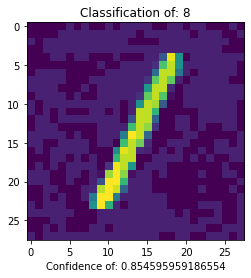

In [ ]:
target = 5 
epsilon = 0.05

target_label = tf.one_hot(target, num_classes) 

targeted_image = targeted_fgsm(model, untargeted_image, target_label, epsilon)

targeted_pred = model.predict(targeted_image)

plt.figure()
plt.grid(False)
plt.imshow(np.reshape(targeted_image,(28,28)))
plt.title("Classification of: {}".format(np.argmax(targeted_pred)))
plt.xlabel("Confidence of: {}".format(np.max(targeted_pred)))

plt.show()

> **Exercise 2:** For the same image sample, explore the range of possible values for epsilon, and report the lowest value that results in misclassification with a confidence of at least %95 (0.95). How does it compare with your results in Exercise 1? Include your interpretation of this comparison in your answer.

In [ ]:
for n in range (1,500)  :
  target = 5 
  epsilon = 0.001*n #

  target_label = tf.one_hot(target, num_classes) 

  targeted_image = targeted_fgsm(model, untargeted_image, target_label, epsilon)

  targeted_pred = model.predict(targeted_image)
  print ('epsilon value=',epsilon)
  print("Classification: {} - Confidence: {}".format(np.argmax(targeted_pred),np.max(targeted_pred)))

epsilon value= 0.001
Classification: 1 - Confidence: 0.9991866946220398
epsilon value= 0.002
Classification: 1 - Confidence: 0.9988349080085754
epsilon value= 0.003
Classification: 1 - Confidence: 0.9983195662498474
epsilon value= 0.004
Classification: 1 - Confidence: 0.9975649118423462
epsilon value= 0.005
Classification: 1 - Confidence: 0.996455729007721
epsilon value= 0.006
Classification: 1 - Confidence: 0.9948348999023438
epsilon value= 0.007
Classification: 1 - Confidence: 0.9925059676170349
epsilon value= 0.008
Classification: 1 - Confidence: 0.9897701740264893
epsilon value= 0.009000000000000001
Classification: 1 - Confidence: 0.9873231053352356
epsilon value= 0.01
Classification: 1 - Confidence: 0.9842001795768738
epsilon value= 0.011
Classification: 1 - Confidence: 0.9802842736244202
epsilon value= 0.012
Classification: 1 - Confidence: 0.9753782749176025
epsilon value= 0.013000000000000001
Classification: 1 - Confidence: 0.9692606925964355
epsilon value= 0.014
Classification: